In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import KNNImputer

import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns

# Diabetes Prediction Model

This notebook implements a machine learning model to predict diabetes based on patient health data. We use the RandomForest classifier, which is effective for classification tasks. The model is trained on features like glucose levels, BMI, age, etc., to predict if a patient has diabetes.

In [ ]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\A S Computer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
%pip install --upgrade gradio

Defaulting to user installation because normal site-packages is not writeable
  Using cached pydantic-2.12.4-py3-none-any.whl.metadata (89 kB)
Using cached pydantic-2.12.4-py3-none-any.whl (463 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.12.5
    Uninstalling pydantic-2.12.5:
      Successfully uninstalled pydantic-2.12.5
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\A S Computer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
%pip install gradio==3.50.2

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\A S Computer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
%pip install openpyxl
df = pd.read_csv("diabetes.csv")
df.head()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\A S Computer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [37]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


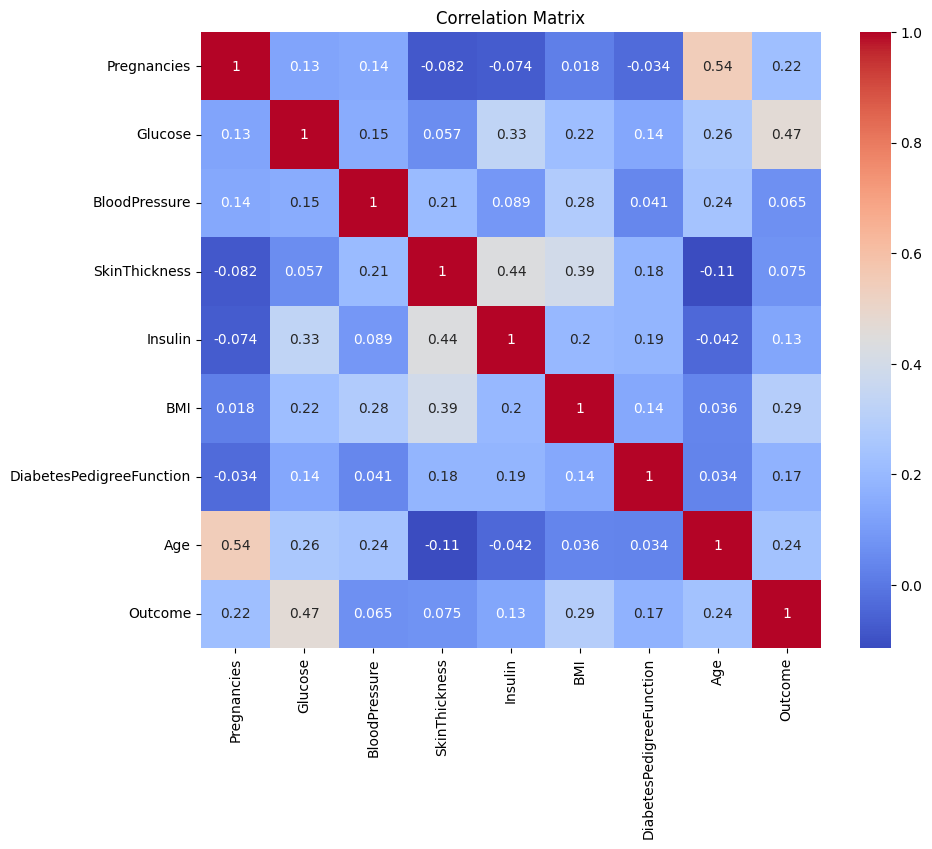

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# Replace unrealistic zero values with KNN imputation
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

imputer = KNNImputer(n_neighbors=5)
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])

X = df.drop("Outcome", axis=1)

In [40]:
y = df["Outcome"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

## Model Evaluation

Here we test the trained model on unseen data to check its accuracy. The model achieves around 81% accuracy on this dataset, which is good for medical prediction.

In [44]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.8116883116883117
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       100
           1       0.79      0.63      0.70        54

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [45]:
def predict_diabetes(preg, glu, bp, skin, ins, bmi, dpf, age):
    data = np.array([[preg, glu, bp, skin, ins, bmi, dpf, age]])
    data = scaler.transform(data)
    prediction = model.predict(data)[0]
    
    if prediction == 1:
        return "Diabetic"
    else:
        return "Not Diabetic"


## Gradio Interface

We use Gradio to build a user-friendly web app for diabetes prediction. Users can enter health metrics, and the model will predict if they are diabetic or not.

In [53]:
%pip install gradio==3.40.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [19 lines of output]
      + C:\Users\A S Computer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe C:\Users\A S Computer\AppData\Local\Temp\pip-install-v3uq2v1s\numpy_3022b8c7ec89443a8200bd4b2ce5424d\vendored-meson\meson\meson.py setup C:\Users\A S Computer\AppData\Local\Temp\pip-install-v3uq2v1s\numpy_3022b8c7ec89443a8200bd4b2ce5424d C:\Users\A S Computer\AppData\Local\Temp\pip-install-v3uq2v1s\numpy_3022b8c7ec89443a8200bd4b2ce5424d\.mesonpy-t54q7u_1 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\A S Computer\AppData\Local\Temp\pip-install-v3uq2v1s\numpy_3022b8c7ec89443a8200bd4b2ce5424d\.mesonpy-t54q7u_1\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\A S Computer\AppData\Local\Temp\pip-install-v3uq2v1s\numpy_3022b8c7ec

In [ ]:
import gradio as gr

def predict_diabetes(preg, glu, bp, skin, ins, bmi, dpf, age):
    data = np.array([[preg, glu, bp, skin, ins, bmi, dpf, age]])
    data = scaler.transform(data)
    prediction = model.predict(data)[0]
    
    if prediction == 1:
        return "Diabetic"
    else:
        return "Not Diabetic"

interface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies"),
        gr.Number(label="Glucose"),
        gr.Number(label="Blood Pressure"),
        gr.Number(label="Skin Thickness"),
        gr.Number(label="Insulin"),
        gr.Number(label="BMI"),
        gr.Number(label="Diabetes Pedigree Function"),
        gr.Number(label="Age")
    ],
    outputs=gr.Textbox(label="Result"),
    title="Diabetes Prediction System",
    description="Enter patient data to predict diabetes"
)

interface.launch()

Prediction function is ready!
Example: predict_diabetes(6, 148, 72, 35, 0, 33.6, 0.627, 50)
Result: Diabetic


C:\Users\A S Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
